In [14]:
import matplotlib.pyplot as plt
import numpy as np
from numpy.random import default_rng
from sympy import expand, I, im, symbols, re

import correlator as corr

In [2]:
eps = symbols('eps')

In [3]:
mass_1, mass_2, mass_3 = 1, 2, 3

In [4]:
qq_grid = np.linspace(0, 30, 61)
p1_p2_grid = [corr.p1_p2(qq) for qq in qq_grid]

In [5]:
corr_data = np.array([corr.zero_temp_use_psd(*p1_p2, mass_1, mass_2, mass_3) for p1_p2 in p1_p2_grid])

In [6]:
Gamma_data = np.array([expand(I*cd).subs('eps', 0) for cd in corr_data])
Gamma_data_re = np.array([re(gd) for gd in Gamma_data])
Gamma_data_im = np.array([im(gd) for gd in Gamma_data])

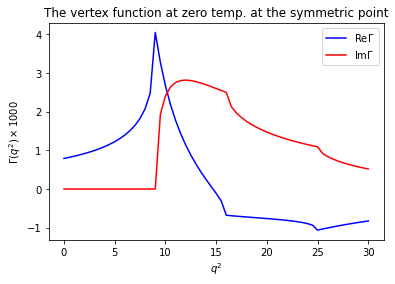

In [7]:
fig, ax = plt.subplots()
ax.plot(qq_grid, 1000*Gamma_data_re, label=r'$\mathrm{Re}\Gamma$', color='blue')
ax.plot(qq_grid, 1000*Gamma_data_im, label=r'$\mathrm{Im}\Gamma$', color='red')
ax.set_xlabel(r'$q^2$')
ax.set_ylabel(r'$\Gamma(q^2) \times 1000$')
ax.set_title('The vertex function at zero temp. at the symmetric point')
ax.legend(loc='upper right')

In [16]:
rng = default_rng()

In [58]:
# k0_eucl_grid = np.sort(rng.normal(0, 3, 25))
k0_eucl_grid = np.linspace(-10, 10, 150)
qq_grid_trimmed = qq_grid[0:10]
p1_p2_grid_trimmed = p1_p2_grid[0:10]
corr_data_trap = np.array([corr.zero_temp_use_trap(*p1_p2, mass_1, mass_2, mass_3, k0_eucl_grid) for p1_p2 in p1_p2_grid_trimmed])

In [59]:
Gamma_data_trap = np.array([expand(I*cdt).subs('eps', 0) for cdt in corr_data_trap])
Gamma_data_trap_re = np.array([re(gdt) for gdt in Gamma_data_trap])
Gamma_data_trap_im = np.array([im(gdt) for gdt in Gamma_data_trap])

Text(0, 0.5, '$\\Gamma(q^2) \\times 1000$')

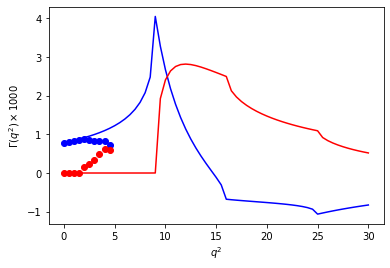

In [60]:
fig, ax = plt.subplots()
ax.scatter(qq_grid_trimmed, 1000*Gamma_data_trap_re, label=r'$\mathrm{Re}\Gamma$', color='blue')
ax.scatter(qq_grid_trimmed, 1000*Gamma_data_trap_im, label=r'$\mathrm{Im}\Gamma$', color='red')
ax.plot(qq_grid, 1000*Gamma_data_re, label=r'$\mathrm{Re}\Gamma$', color='blue')
ax.plot(qq_grid, 1000*Gamma_data_im, label=r'$\mathrm{Im}\Gamma$', color='red')
ax.set_xlabel(r'$q^2$')
ax.set_ylabel(r'$\Gamma(q^2) \times 1000$')
# ax.legend()